### Model Training

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unrar x '/content/drive/MyDrive/EarVN1.0 dataset.rar'

Streaming output truncated to the last 5000 lines.
Extracting  EarVN1.0 dataset/Images/134.Minh_Tr/134 (96).jpg              80%  OK 
Extracting  EarVN1.0 dataset/Images/134.Minh_Tr/134 (97).jpg              80%  OK 
Extracting  EarVN1.0 dataset/Images/134.Minh_Tr/134 (98).jpg              80%  OK 
Extracting  EarVN1.0 dataset/Images/134.Minh_Tr/134 (99).jpg              80%  OK 
Creating    EarVN1.0 dataset/Images/135.Minh_T                        OK
Extracting  EarVN1.0 dataset/Images/135.Minh_T/135 (1).jpg                80%  OK 
Extracting  EarVN1.0 dataset/Images/135.Minh_T/135 (10).jpg               80%  OK 
Extracting  EarVN1.0 dataset/Images/135.Minh_T/135 (100).jpg              80%  OK 
Extracting  EarVN1.0 dataset/Images/135.Minh_T/135 (101).jpg              80%  OK 
Extracting  EarVN1.0 dataset/Images/135.Minh_T/135 (102).jpg              80%  OK 
Extracting  EarVN1.0 dataset/Images/135.Minh_T/1

In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [4]:
DATA_DIR = '/content/EarVN1.0 dataset/Images/'
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 64

In [5]:
train_val_ds = tf.keras.utils.image_dataset_from_directory(
  DATA_DIR,
  validation_split=0.15,
  label_mode='int',
  subset="training",
  seed=999,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 28412 files belonging to 164 classes.
Using 24151 files for training.


In [6]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  DATA_DIR,
  validation_split=0.15,
  label_mode='int',
  subset="validation",
  seed=999,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 28412 files belonging to 164 classes.
Using 4261 files for validation.


In [7]:
train_val_batches = tf.data.experimental.cardinality(train_val_ds)
train_val_batches

<tf.Tensor: shape=(), dtype=int64, numpy=378>

In [8]:
TOTAL_TRAIN_VAL = len(train_val_ds)
print(TOTAL_TRAIN_VAL)
train_ds = train_val_ds.take(int(8 * train_val_batches / 10))
val_ds = train_val_ds.skip(int(8 * train_val_batches / 10))
print(len(train_ds))
print(len(val_ds))

378
302
76


In [9]:
train_ds

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D, GlobalMaxPooling2D

model = tf.keras.Sequential()

# Convolutional Layer 1
model.add(Conv2D(96, (5, 5), strides=(2, 2), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

# Convolutional Layer 2
model.add(Conv2D(256, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.2))

# Convolutional Layer 3
model.add(Conv2D(384, (3, 3), activation='relu'))
model.add(Dropout(0.5))

# Convolutional Layer 4
model.add(Conv2D(384, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.2))

# Convolutional Layer 5
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(164, activation='softmax'))

In [29]:
from tensorflow.keras import optimizers, losses
model.compile(optimizer=optimizers.Adam(learning_rate=3e-4), loss='sparse_categorical_crossentropy', metrics='accuracy')

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint(
    filepath='./best_alexnetmodified2_model_epoch={epoch:02d}_acc={val_accuracy:0.4f}.h5',
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    save_freq='epoch'
)

In [33]:
results = model.fit(train_ds, validation_data=val_ds, epochs=50, batch_size=64, callbacks=[mc])

Epoch 1/50
302/302 [==============================] - ETA: 0s - loss: 5.0984 - accuracy: 0.0102
Epoch 1: val_accuracy improved from -inf to 0.01203, saving model to ./best_alexnetmodified2_model_epoch=01_acc=0.0120.h5
302/302 [==============================] - 77s 254ms/step - loss: 5.0984 - accuracy: 0.0102 - val_loss: 5.0941 - val_accuracy: 0.0120
Epoch 2/50
302/302 [==============================] - ETA: 0s - loss: 5.0930 - accuracy: 0.0106
Epoch 2: val_accuracy improved from 0.01203 to 0.01286, saving model to ./best_alexnetmodified2_model_epoch=02_acc=0.0129.h5
302/302 [==============================] - 82s 271ms/step - loss: 5.0930 - accuracy: 0.0106 - val_loss: 5.0910 - val_accuracy: 0.0129
Epoch 3/50
302/302 [==============================] - ETA: 0s - loss: 5.0910 - accuracy: 0.0103
Epoch 3: val_accuracy did not improve from 0.01286
302/302 [==============================] - 75s 248ms/step - loss: 5.0910 - accuracy: 0.0103 - val_loss: 5.0912 - val_accuracy: 0.0122
Epoch 4/50
3

In [35]:
predictions = []
y_true = []
for img, labels in test_ds:
    predictions.extend(model.predict_on_batch(img))
    y_true.extend(labels.numpy())
y_true = np.array(y_true)

In [36]:
y_pred = np.argmax(predictions, axis=1)

In [37]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.48      0.50      0.49        50
           1       0.34      0.72      0.46        39
           2       0.54      0.29      0.38        24
           3       0.53      0.58      0.55        31
           4       0.50      0.50      0.50        34
           5       0.39      0.46      0.42        35
           6       0.53      0.43      0.48        23
           7       0.32      0.31      0.31        26
           8       0.72      0.37      0.49        35
           9       0.46      0.64      0.54        28
          10       0.51      0.78      0.62        23
          11       0.41      0.52      0.45        29
          12       0.23      0.58      0.33        24
          13       0.53      0.47      0.50        17
          14       0.58      0.65      0.61        34
          15       0.53      0.64      0.58        28
          16       0.44      0.52      0.48        23
          17       0.61    

In [38]:
history = results.history

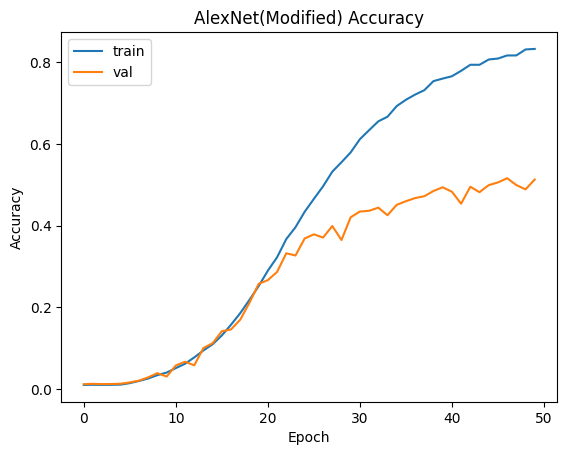

In [39]:
from matplotlib import pyplot as plt

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('AlexNet(Modified) Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

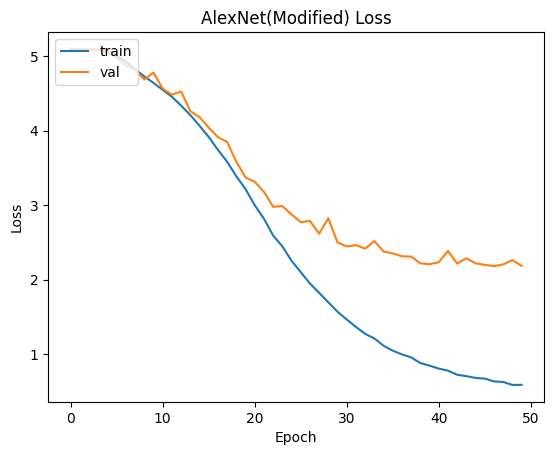

In [40]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('AlexNet(Modified) Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()